In [ ]:
!pip install squarify

## Gọi kiểm tra và xử lý data

In [ ]:
#Xử lý dữ liệu
import numpy as np
import pandas as pd
#Xử lý về thời gian ngày giờ
import calendar
#Trực quan hóa dữ
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import squarify
#Mô hình
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
#Đánh giá mô hình
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric,plot_plotly, plot_components_plotly
from prophet.diagnostics import performance_metrics
from sklearn.metrics import mean_absolute_error
#Tinh chỉnh mô hình
from sklearn.model_selection import ParameterGrid
from itertools import product
#Encoding
from sklearn.preprocessing import LabelEncoder
#Căt dữ liệu để train và test
from sklearn.model_selection import train_test_split


In [ ]:
path = '/content/drive/MyDrive/Data/DataCoSupplyChainDataset.csv'
data = pd.read_csv(path,encoding="ISO-8859-1")
data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
data.shape

(180519, 53)

In [ ]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


Tiền xử lý dữ liệu
chúng em sẽ tập trung vào dữ liệu bán hàng lịch sử và các thuộc tính sản phẩm như; mức tồn kho và danh mục sản phẩm, chúng em cũng sẽ phân tích tác động của các biến số khác góp phần tạo nên mô hình nhu cầu bao gồm các yếu tố địa lý, phân khúc khách hàng và thời gian giao hàng.

Nhiệm vụ tiền xử lý:

Bỏ các cột không liên quan

Xóa các hàng có giá trị bị thiếu,kiểm tra trùng lặp

Tạo đặc trưng mới

Chuyển đổi đặc điểm phân loại thành đặc điểm số


1. Bỏ các cột không liên quan

In [ ]:
#các cột ta sử dụng
columns = ['Days for shipping (real)',
                  'Days for shipment (scheduled)',
                  'Customer Country',
                  'Sales per customer',
                  'Delivery Status',
                  'Late_delivery_risk',
                  'Customer City',
                  'Customer Segment',
                  'Sales','Shipping Mode',
                  'Product Card Id',
                  'Product Category Id',
                  'Product Name',
                  'Product Price',
                  'Market',
                  'Product Status',
                  'shipping date (DateOrders)',
                  'Type'
                ]
#lọc tất cả cấc cột trong data không có trong danh sách trên
columns_drop = [colum for colum in data.columns if colum not in  columns ]
#xóa các cột bằng drop
data = data.drop(columns=columns_drop)
print('Số cột đã xóa',len(columns_drop),'số cột còn lại',len(data.columns))

Số cột đã xóa 35 số cột còn lại 18


'Days for shipping (real)' - Số ngày vận chuyển (thực tế)

'Days for shipment (scheduled)' - Số ngày vận chuyển (dự kiến)

'Customer Country' - Quốc gia của khách hàng

'Sales per customer' - Doanh số bán hàng trên mỗi khách hàng

'Delivery Status' - Tình trạng giao hàng

'Late_delivery_risk' - Rủi ro giao hàng trễ

'Customer City' - Thành phố của khách hàng

'Customer Segment' - Phân khúc khách hàng

'Sales' - Doanh số bán hàng

'Shipping Mode' - Phương thức vận chuyển

'Product Card Id' - ID của sản phẩm

'Product Category Id' - ID của danh mục sản phẩm

'Product Name' - Tên sản phẩm

'Product Price' - Giá sản phẩm

'Market' - Thị trường

'Product Status' - Tình trạng sản phẩm

'shipping date (DateOrders)' - Ngày vận chuyển (DateOrders)


2. Xóa các hàng có giá trị bị thiếu

In [ ]:

def check_miss_value(data):
#lấy tổng các dòng bị thiếu trong data
  data = data.isnull().sum().sum()
#nếu data = 0 thì in ra không có dữ liệu bị thiếu và ngược lại sẽ in ra số dòng bị thiếu
  if data == 0:
     print('Không có hàng bị thiếu dữ liệu ')
  else:
     print('Số hàng bị thiếu dữ liệu là:',data)
#duyệt và in ra cột và số lượng bị rỗng trong cột
     for column, null_count in data.iteritems():
            if null_count > 0:
                print(f"{column}: {null_count}")
     return data
check_miss_value(data)

Không có hàng bị thiếu dữ liệu 


2.1 Kiểm tra trùng lặp dữ liêu

In [ ]:
def dup_data(data):
    # Khai báo duplicated để kiểm tra trùng lặp
    dups = data.duplicated()
    #Nếu dups có dữ liệu lặp thì hàm any() sẽ trả về true thì sẽ in ra dữ liệu bị trùng lặp và ngược lại
    if dups.any():
        print('Data bị trùng lặp')
    else:
        print('Data không bị trùng lặp')

    return dups

result = dup_data(data)
print(result)


Data không bị trùng lặp
0         False
1         False
2         False
3         False
4         False
          ...  
180514    False
180515    False
180516    False
180517    False
180518    False
Length: 180519, dtype: bool


3. Tạo đặc trưng mới

Tập dữ liệu chứa cột `shipping date (DateOrders)` là đối tượng `DateTime` mà từ đó chúng ta có thể trích xuất `Tháng`, `Năm`, `Ngày` và `Ngày trong tuần`

Tháng - để nắm bắt số tháng cho mỗi lần bán hàng.

Năm - để nắm bắt số năm trên mỗi lần bán hàng.

Ngày - để ghi lại ngày trên mỗi lần bán hàng.

Ngày trong tuần - để ghi lại ngày trong tuần cho mỗi lần bán hàng.

Thời gian giao hàng mới, đây là sự khác biệt giữa Số ngày vận chuyển (theo lịch trình) và Số ngày vận chuyển (thực).Điều này sẽ giúp ta hiểu được tác động của thời gian thực hiện đối với nhu cầu.

In [ ]:
# hàm này sẽ truyền vào data,cột được chuyển đổi,tên cột mới
def extrack_value(data,extrack_colums,prefix):
  #chuyển cột chuyển đổi thành kiểu datetime
    data[extrack_colums] = pd.to_datetime(data[extrack_colums])
  #chuyển đổi
    data[f'{prefix} Year'] = data[extrack_colums].dt.year
    data[f'{prefix} Month'] = data[extrack_colums].dt.month
    data[f'{prefix} Day'] = data[extrack_colums].dt.day
    data[f'{prefix} Weekday'] = data[extrack_colums].dt.weekday
  # kiểm tra xem các cột mới tạo đã có trong data chưa neus có thì in ra tạo thành công và ngược lại
    if f'{prefix} Year' in data.columns and f'{prefix} Month' in data.columns and f'{prefix} Day' in data.columns and f'{prefix} Weekday' in data.columns:
      print('Tạo thành công')
    else:
        print('Lỗi tạo cột')
  #tạo cột  mới tên là Lead Time
    data['Lead Time'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']
    return data
data1 = data.copy()
extrack_value(data1,'shipping date (DateOrders)','Shipping').head(5)

Tạo thành công


,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Customer City,Customer Country,Customer Segment,Market,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Shipping Year,Shipping Month,Shipping Day,Shipping Weekday,Lead Time
0,DEBIT,3,4,314.640015,Advance shipping,0,Caguas,Puerto Rico,Consumer,Pacific Asia,...,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018,2,3,5,-1
1,TRANSFER,5,4,311.359985,Late delivery,1,Caguas,Puerto Rico,Consumer,Pacific Asia,...,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018,1,18,3,1
2,CASH,4,4,309.720001,Shipping on time,0,San Jose,EE. UU.,Consumer,Pacific Asia,...,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,2018,1,17,2,0
3,DEBIT,3,4,304.809998,Advance shipping,0,Los Angeles,EE. UU.,Home Office,Pacific Asia,...,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,2018,1,16,1,-1
4,PAYMENT,2,4,298.250000,Advance shipping,0,Caguas,Puerto Rico,Corporate,Pacific Asia,...,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2018,1,15,0,-2


## Trực quan hóa dữ liệu thăm dò

Phân tích đơn biến

Phân tích chuỗi thời gian thăm dò

1. Phân tích đơn biến

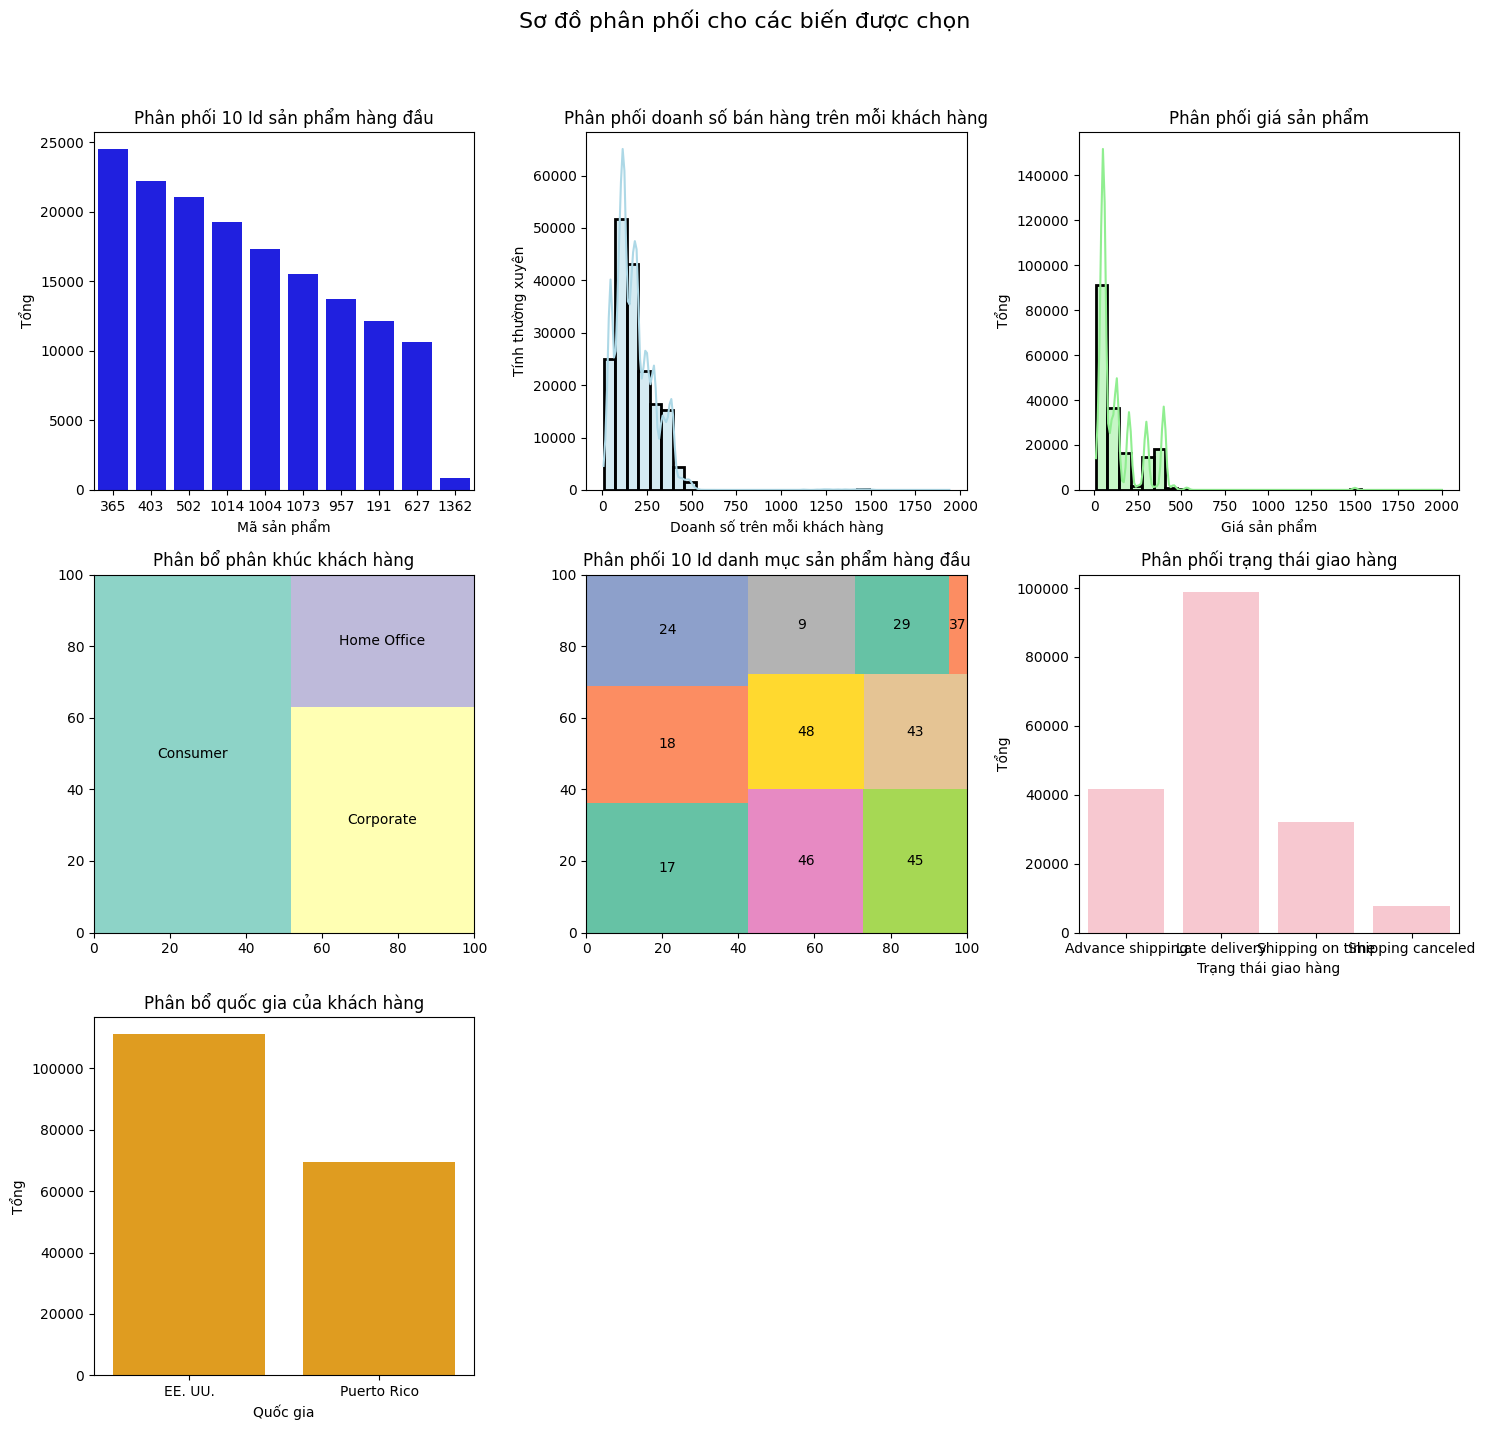

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
fig.suptitle('Sơ đồ phân phối cho các biến được chọn',fontsize=16)
sns.countplot(data=data,x='Product Card Id',
              color='blue',ax=axes[0,0],
              order = data['Product Card Id'].value_counts().iloc[:10].index)
axes[0, 0].set_title('Phân phối 10 Id sản phẩm hàng đầu')
axes[0, 0].set_xlabel('Mã sản phẩm')
axes[0, 0].set_ylabel('Tổng')


sns.histplot(data=data, x='Sales per customer',
             bins=30, kde=True, linewidth=2,
             color='lightblue', ax=axes[0, 1])
axes[0, 1].set_title('Phân phối doanh số bán hàng trên mỗi khách hàng')
axes[0, 1].set_xlabel('Doanh số trên mỗi khách hàng')
axes[0, 1].set_ylabel('Tính thường xuyên')


sns.histplot(data=data, x='Product Price', bins=30, kde=True,
             color='lightgreen', linewidth=2, ax=axes[0,2])
axes[0, 2].set_title('Phân phối giá sản phẩm')
axes[0, 2].set_xlabel('Giá sản phẩm')
axes[0, 2].set_ylabel('Tổng')

squarify.plot(sizes=data['Customer Segment'].value_counts(),
              label=data['Customer Segment'].value_counts().index,
              color=sns.color_palette("Set3"), ax=axes[1, 0])
axes[1, 0].set_title('Phân bổ phân khúc khách hàng')


squarify.plot(sizes=data['Product Category Id'].value_counts().iloc[:10],
                label=data['Product Category Id'].value_counts().iloc[:10].index,
                color=sns.color_palette("Set2"), ax=axes[1, 1])
axes[1, 1].set_title('Phân phối 10 Id danh mục sản phẩm hàng đầu')

sns.countplot(data=data, x='Delivery Status',
                color='pink', ax=axes[1,2])
axes[1, 2].set_title('Phân phối trạng thái giao hàng')
axes[1, 2].set_xlabel('Trạng thái giao hàng')
axes[1, 2].set_ylabel('Tổng')

sns.countplot(data=data, x='Customer Country',
                color='orange', ax=axes[2, 0],
                order=data['Customer Country'].value_counts().iloc[:10].index)
axes[2, 0].set_title('Phân bổ quốc gia của khách hàng')
axes[2, 0].set_xlabel('Quốc gia')
axes[2, 0].set_ylabel('Tổng')

axes[2, 1].remove()
axes[2, 2].remove()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ID sản phẩm bán chạy nhất là 365 tương ứng với tên sản phẩm: Perfect Fitness Perfect Rip Deck.Nhóm sẽ tập trung quá trình dự báo nhu cầu vào sản phẩm này trong tương lai

Sự phân bổ giá trị bán hàng và doanh số bán hàng trên mỗi khách hàng đều có độ lệch dương với một cái đuôi dài. Điều này cho thấy phần lớn doanh số bán hàng là dành cho các sản phẩm có giá trị thấp. Đây là một thông tin chi tiết thú vị vì nó có thể gợi ý rằng phần lớn khách hàng rất nhạy cảm về giá.


Phân phối giá sản phẩm cũng có độ lệch dương với đuôi dài. Điều này có nghĩa là phần lớn sản phẩm là sản phẩm có giá trị thấp.


Sự phân bổ của phân khúc khách hàng cho thấy phần lớn khách hàng đều thuộc phân khúc người tiêu dùng.




2. Phân tích chuỗi thời gian thăm dò

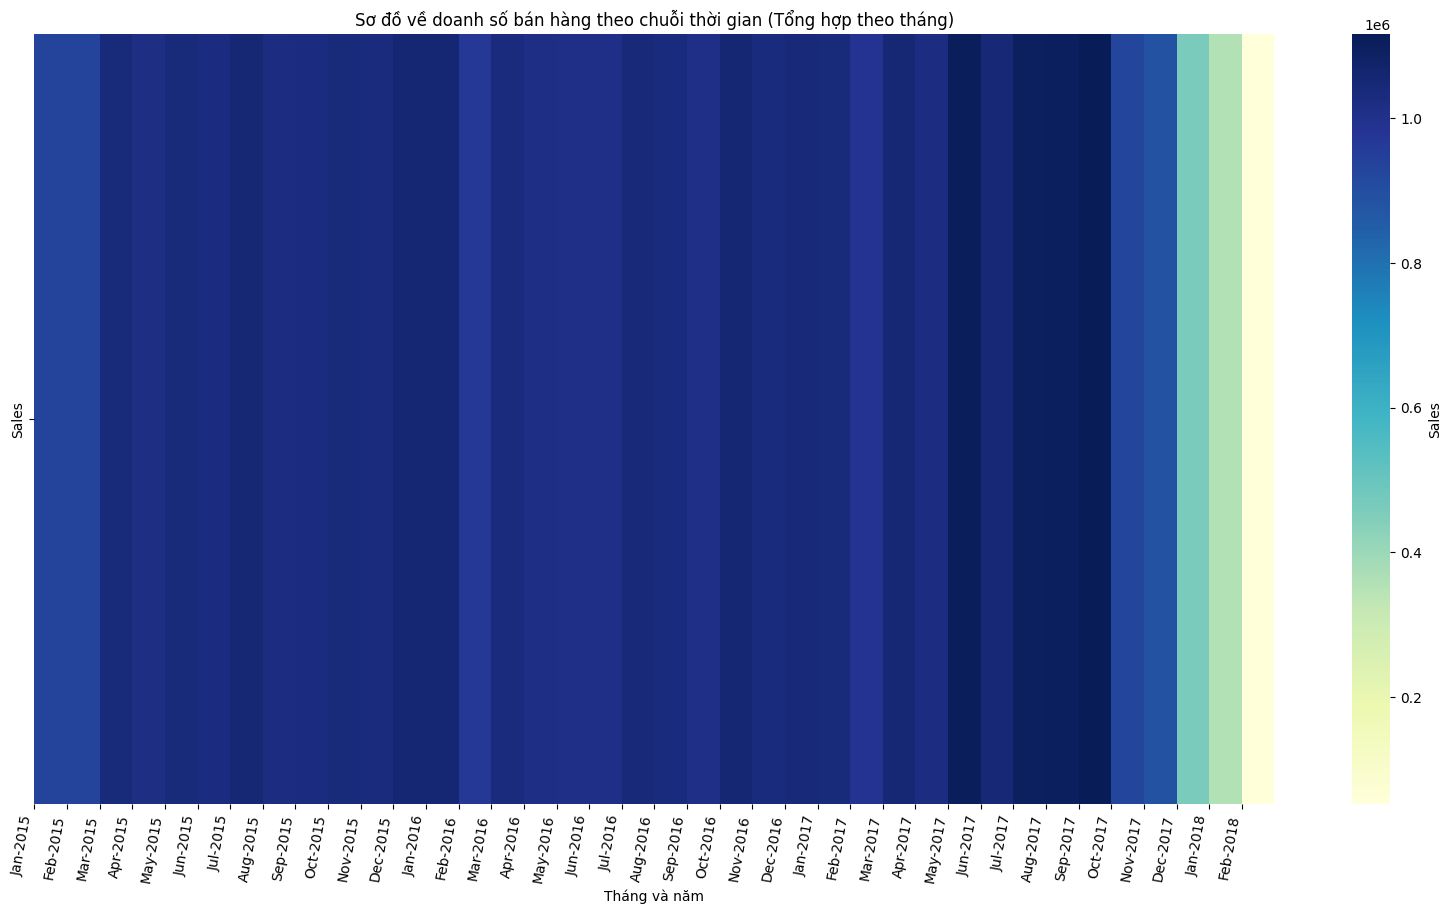

In [ ]:
df_heatmap = data1[['shipping date (DateOrders)', 'Sales']]
df_heatmap.set_index('shipping date (DateOrders)', inplace=True)
resampled_df = df_heatmap.resample('M').sum()
month_labels = [calendar.month_abbr[m.month] + '-' + str(m.year) for m in resampled_df.index]
plt.figure(figsize=(20, 10))
sns.heatmap(resampled_df.T, cmap='YlGnBu', cbar_kws={'label': 'Sales'})
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=80, ha='right')

plt.title('Sơ đồ về doanh số bán hàng theo chuỗi thời gian (Tổng hợp theo tháng)')
plt.xlabel('Tháng và năm')

plt.show()

Đánh giá tính nhất quán về sắc thái của bản đồ nhiệt, chúng ta có thể thấy rằng nhu cầu về sản phẩm bán chạy nhất khá ổn định theo thời gian. Tuy nhiên, điều thú vị cần lưu ý là số lượng doanh số bán hàng được ghi nhận trong quý đầu tiên của năm 2015, 2016 và 2017 vẫn ổn định tuy nhiên trong năm 2018 số lượng doanh số bán hàng được ghi nhận trong quý đầu tiên đã giảm đáng kể.



## Chuyển đổi đặc điểm phân loại thành đặc điểm số

In [ ]:
#hàm này truyền data,các cột phân loại,các cột xóa đi
def prepare_data(data, categorical_cols, columns_to_drop):

    try:
      #gọi lớp LabelEncoder
        label_encoder = LabelEncoder()
      #sao chép dữ liệu
        df_label_encoded = data.copy()
     #duyệt các cột trong danh sách cột phân loại
        for col in categorical_cols:
          #Chuyển đổi kiểu dữ liệu bằng fit_transform
            df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])
            #Xóa các cột
        df_label_encoded = df_label_encoded.drop(columns=columns_to_drop)

          #chuyển đổi one-hot bằng get_dummies
        df_one_hot_encoded = pd.get_dummies(data, columns=categorical_cols)
        #xóa các cột
        df_one_hot_encoded = df_one_hot_encoded.drop(columns=columns_to_drop)
        print("Đã chuyển đổi ")
        return  df_one_hot_encoded, df_label_encoded
    except Exception as e:
        print(f"Lỗi chuyển đổi {e}")
        return None, None


categorical_cols = ['Type', 'Customer Segment',
                    'Delivery Status',
                    'Customer City',
                    'Market',
                    'Shipping Mode',
                    'Customer Country']

columns_to_drop = ['Product Name',
                   'Days for shipment (scheduled)',
                   'Sales per customer',
                   'Days for shipping (real)',
                   'shipping date (DateOrders)',
                   'Product Card Id',
                   'Product Category Id',
                   'Product Status',
                  ]

onehot_encode_df, label_encode_df = prepare_data( data1, categorical_cols, columns_to_drop)

label_encode_df = label_encode_df.rename(columns={'Type': 'Payment Type'})
onehot_encode_df = onehot_encode_df.rename(columns={'Type': 'Payment Type'})

Đã chuyển đổi 


In [ ]:
#lấy sản phẩm bán chạy nhất để phân tích dự đoán trong tương lai
data_top_product = data[data['Product Card Id'] == 365]
data_top_product.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Customer City,Customer Country,Customer Segment,Market,Sales,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
48,PAYMENT,5,2,115.180000,Late delivery,1,Bayamon,Puerto Rico,Home Office,Pacific Asia,119.980003,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,2/29/2016 13:57,Second Class
57,PAYMENT,6,2,117.580002,Late delivery,1,Caguas,Puerto Rico,Home Office,USCA,119.980003,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,4/19/2016 10:12,Second Class
58,PAYMENT,4,2,95.980003,Late delivery,1,Caguas,Puerto Rico,Home Office,USCA,119.980003,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,5/26/2016 14:10,Second Class
66,PAYMENT,4,2,176.369995,Late delivery,1,Caguas,Puerto Rico,Home Office,Europe,179.970001,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,9/26/2015 7:41,Second Class
67,PAYMENT,2,2,167.369995,Shipping on time,0,Caguas,Puerto Rico,Home Office,Europe,179.970001,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,7/4/2017 9:03,Second Class


## Dự báo nhu cầu với Prophet

Sử dụng thư viện Prophet để lập mô hình nhu cầu về sản phẩm bán chạy nhất

In [ ]:
path='https://raw.githubusercontent.com/uWaterloo/Datasets/master/Holidays/holidays.csv'
holidays_df = pd.read_csv(path)
holidays_df
#đổi tên cột
holidays_df = holidays_df.rename(columns={'date': 'ds'})
#thêm 2 cột lower_window,upper_window
holidays_df['lower_window'] = 0
holidays_df['upper_window'] = 1
#chuyển cột ds thành datetime
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])


In [ ]:
#copy dữ liệu
prophet_df = data_top_product.copy()
#đổi tên cột dữ liệu
prophet_df = prophet_df.rename(columns={'shipping date (DateOrders)': 'ds', 'Sales': 'y'})
#gọi thư viện mô hình Prophet
prophet = Prophet(holidays=holidays_df)
#thực hiện train mô hình
prophet.fit(prophet_df)
#tạo dữ liệu trong tương lại ở đây là 365 ngày tiếp theo
future = prophet.make_future_dataframe(periods=365, freq='D')
#dự đoán
forecast = prophet.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_nrbrk9g/xagc4g9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_nrbrk9g/butgw3kw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83309', 'data', 'file=/tmp/tmp_nrbrk9g/xagc4g9z.json', 'init=/tmp/tmp_nrbrk9g/butgw3kw.json', 'output', 'file=/tmp/tmp_nrbrk9g/prophet_models8ted_g0/prophet_model-20240510231020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Đoạn mã trên sử dụng thư viện Prophet để mô hình hóa nhu cầu về sản phẩm bán chạy nhất. Mô hình được đào tạo trên cột bán hàng  và cột ngày giao hàng. Sau đó, mô hình này được sử dụng để dự báo nhu cầu về sản phẩm bán chạy nhất trong 365 ngày tới


Quy tắc này cũng bao gồm các ngày lễ để tính đến tác động của các ngày lễ đối với nhu cầu về sản phẩm bán chạy nhất. Điều này rất quan trọng vì những ngày nghỉ lễ có thể có tác động đáng kể đến mô hình nhu cầu.

Tại sao các ngày lễ ở Puerto Rico lại được đưa vào mô hình. Từ phân tích đơn biến được thực hiện trước đó, ta phát hiện ra rằng hầu hết các đơn đặt hàng đều đến từ Puerto Rico. Biến dự báo hiện chứa các giá trị dự báo cho sản phẩm bán chạy nhất

Đánh giá độ chính xác của dự báo chuỗi thời gian

model=prophet: Đây là mô hình Prophet bạn đã tạo trước đó và muốn sử dụng cho việc cross-validation.

initial='640 days': Đây là thời gian ban đầu mà mô hình sẽ được huấn luyện trên. Trong trường hợp này, mô hình sẽ được huấn luyện trên dữ liệu của 640 ngày đầu tiên.

period='365 days': Đây là khoảng thời gian mà mỗi lần kiểm tra sẽ được thực hiện trên. Trong trường hợp này, mỗi lần kiểm tra sẽ sử dụng dữ liệu trong 365 ngày tiếp theo sau thời điểm kết thúc của tập huấn luyện trước đó.

horizon='365 days': Đây là khoảng thời gian mà mỗi lần dự đoán sẽ được thực hiện cho mỗi lượt kiểm tra. Trong trường hợp này, mỗi lần dự đoán sẽ được thực hiện cho 365 ngày tiếp theo sau thời điểm kết thúc của tập huấn luyện.

In [ ]:
#model=prophet: là mô hình Prophet
#initial='640 days':mô hình sẽ được huấn luyện trên dữ liệu của 640 ngày đầu tiên
#period='365 days': mỗi lần kiểm tra sẽ sử dụng dữ liệu trong 365 ngày tiếp theo sau thời điểm kết thúc của tập huấn luyện trước
#horizon='365 days':mỗi lần dự đoán sẽ được thực hiện cho 365 ngày tiếp theo sau thời điểm kết thúc của tập huấn luyện
data_coss_var = cross_validation(model=prophet,initial='640 days',period='365 days', horizon='365 days')
data_coss_var

In [ ]:
data_coss_var

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-08 09:15:00,179.467293,62.825936,294.107017,179.970001,2016-10-08 07:52:00
1,2016-10-08 11:00:00,178.353822,67.714715,280.977185,179.970001,2016-10-08 07:52:00
2,2016-10-08 14:09:00,179.896264,70.530127,286.509072,299.950012,2016-10-08 07:52:00
3,2016-10-08 14:09:00,179.896264,64.053199,275.645240,299.950012,2016-10-08 07:52:00
4,2016-10-08 16:16:00,177.639796,73.158861,280.367183,59.990002,2016-10-08 07:52:00
...,...,...,...,...,...,...
8768,2017-10-07 12:36:00,179.755050,69.492713,284.238395,239.960007,2016-10-08 07:52:00
8769,2017-10-07 14:21:00,180.450204,77.260671,286.419170,299.950012,2016-10-08 07:52:00
8770,2017-10-08 04:22:00,174.270994,58.411381,282.822437,59.990002,2016-10-08 07:52:00
8771,2017-10-08 07:52:00,178.717764,67.155358,283.533674,299.950012,2016-10-08 07:52:00


In [ ]:
# Đo sai số
df_performance = performance_metrics(data_coss_var)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days 21:40:00,7502.208586,86.615291,74.757941,0.642936,0.404250,0.449726,0.592930
1,35 days 22:11:00,7519.047818,86.712443,74.895936,0.645243,0.404480,0.450871,0.591790
2,36 days 03:47:00,7523.566682,86.738496,74.965899,0.645831,0.404565,0.451334,0.591790
3,36 days 04:29:00,7507.147063,86.643794,74.833102,0.645398,0.404565,0.450786,0.592930
4,36 days 04:30:00,7495.324753,86.575544,74.768729,0.645546,0.406847,0.450694,0.594071
...,...,...,...,...,...,...,...,...
6470,363 days 21:44:00,6810.518999,82.525869,69.786758,0.591331,0.398441,0.418998,0.637970
6471,364 days 04:44:00,6805.381177,82.494734,69.758446,0.591268,0.398441,0.418907,0.638540
6472,364 days 06:29:00,6811.122711,82.529526,69.792101,0.590412,0.398441,0.418744,0.637970
6473,364 days 20:30:00,6815.473071,82.555878,69.819804,0.591274,0.398441,0.419126,0.638540


Hàm cross_validation() thực hiện xác thực chéo trên mô hình. Nó huấn luyện mô hình trên một tập hợp con dữ liệu và sau đó đánh giá mô hình trên dữ liệu còn lại. Đây là một cách tốt để đánh giá độ chính xác của mô hình. Tham số ban đầu chỉ định kích thước của tập huấn luyện. Tham số thời kỳ chỉ định tần suất của dự báo.


Trực quan hiệu suất mô hình

<Figure size 900x600 with 0 Axes>

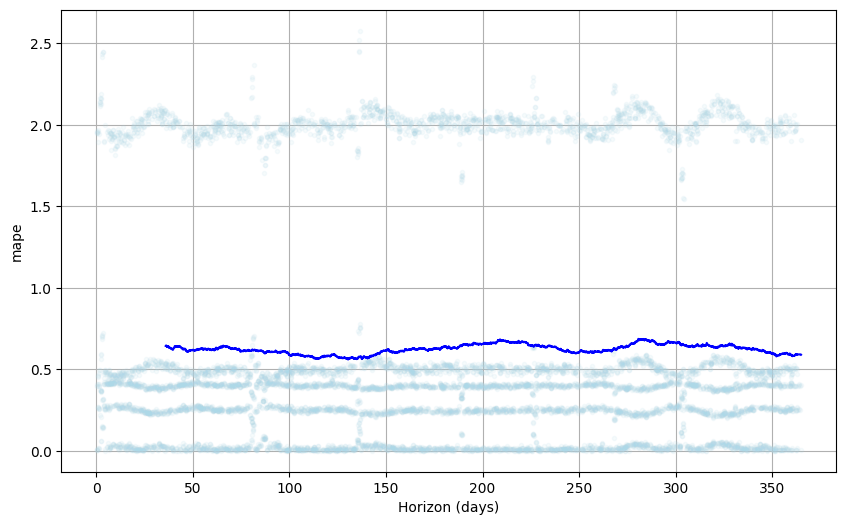

In [ ]:

plt.figure(figsize=(9,6))
fig = plot_cross_validation_metric(data_coss_var,metric='mape')
fig.get_axes()[0].get_lines()[0].set_markerfacecolor('#ADD8E7')
fig.get_axes()[0].get_lines()[0].set_markeredgecolor('#ADD8E7')

## Tìm sự kết hợp siêu tham số tốt nhất cho MAPE thấp hơn

Tạo lưới các siêu tham số

In [ ]:

param_grid = {
    'seasonality_mode': ["additive", 'multiplicative'],
    'seasonality_prior_scale': [1, 5, 10, 20],
    'holidays_prior_scale': [5, 10, 20, 25],
    'changepoint_prior_scale': [0.005, 0.01, 0.05, 0.1]
}

param_combinations = ParameterGrid(param_grid)

Train mô hình với các siêu tham số được tạo

In [ ]:

results = []
print(f"trying all {len(param_combinations)} hyperparameter combinations")

param_combinations = [dict(zip(param_grid.keys(),v)) for v in product(*param_grid.values())]

for params in param_combinations:
    prophet = Prophet(**params)
    prophet.fit(prophet_df)
    df_cv = cross_validation(model=prophet, initial='640 days', period='365 days', horizon='365 days',parallel="processes")
    df_metrics = performance_metrics(df_cv, rolling_window=0)
    results.append(df_metrics['mape'].values[0])

In [ ]:
#danh sách kết quả
turning_results = pd.DataFrame(param_combinations)
turning_results['mape'] = results
turning_results


,seasonality_mode,seasonality_prior_scale,holidays_prior_scale,changepoint_prior_scale,mape
0,additive,1,5,0.005,0.004572
1,additive,1,5,0.010,0.002773
2,additive,1,5,0.050,0.002922
3,additive,1,5,0.100,0.002881
4,additive,1,10,0.005,0.004572
...,...,...,...,...,...
123,multiplicative,20,20,0.100,0.002610
124,multiplicative,20,25,0.005,0.006146
125,multiplicative,20,25,0.010,0.003654
126,multiplicative,20,25,0.050,0.002344


In [ ]:
#tham số tốt nhất
best_param = param_combinations[np.argmin(results)]
print('Tham số tốt nhất cho mô hình',best_param)

Tham số tốt nhất cho mô hình {'seasonality_mode': 'additive', 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'changepoint_prior_scale': 0.01}


Buil model với tham số mới tinh chỉnh

In [ ]:
prophet_best = Prophet(holidays=holidays_df,
                       seasonality_mode='additive',
                       seasonality_prior_scale=10,
                       holidays_prior_scale=5,
                       changepoint_prior_scale=0.01)
prophet_best.fit(prophet_df)
future = prophet_best.make_future_dataframe(periods=365,freq='D')
new_forecast = prophet_best.predict(future)

Đánh giá mô hình

In [ ]:
data_coss_var_turning = cross_validation(model=prophet_best, initial='640 days', period='365 days', horizon='365 days')


In [ ]:
data_coss_var_turning

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-08 09:15:00,179.847196,70.445360,284.686095,179.970001,2016-10-08 07:52:00
1,2016-10-08 11:00:00,178.717499,69.904020,289.807355,179.970001,2016-10-08 07:52:00
2,2016-10-08 14:09:00,180.209821,70.272436,295.054288,299.950012,2016-10-08 07:52:00
3,2016-10-08 14:09:00,180.209821,80.246513,288.280612,299.950012,2016-10-08 07:52:00
4,2016-10-08 16:16:00,177.966551,70.441914,287.194168,59.990002,2016-10-08 07:52:00
...,...,...,...,...,...,...
8768,2017-10-07 12:36:00,179.901075,64.994269,294.140576,239.960007,2016-10-08 07:52:00
8769,2017-10-07 14:21:00,180.590876,70.393108,295.054015,299.950012,2016-10-08 07:52:00
8770,2017-10-08 04:22:00,174.497436,69.982526,284.595218,59.990002,2016-10-08 07:52:00
8771,2017-10-08 07:52:00,178.913161,72.744557,290.087818,299.950012,2016-10-08 07:52:00


In [ ]:
#sai số
df_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days 21:40:00,7492.464952,86.559026,74.698980,0.641909,0.404851,0.449483,0.597491
1,35 days 22:11:00,7509.262240,86.655999,74.837235,0.644215,0.405050,0.450629,0.596351
2,36 days 03:47:00,7513.762240,86.681960,74.907453,0.644804,0.405055,0.451094,0.596351
3,36 days 04:29:00,7497.427134,86.587685,74.774840,0.644371,0.405055,0.450547,0.597491
4,36 days 04:30:00,7485.668446,86.519758,74.710650,0.644519,0.405368,0.450455,0.598632
...,...,...,...,...,...,...,...,...
6470,363 days 21:44:00,6810.116029,82.523427,69.785246,0.591036,0.398861,0.419010,0.642531
6471,364 days 04:44:00,6804.915800,82.491914,69.756519,0.590971,0.398861,0.418917,0.643101
6472,364 days 06:29:00,6810.633856,82.526565,69.790013,0.590116,0.398861,0.418753,0.642531
6473,364 days 20:30:00,6815.058124,82.553365,69.817975,0.590984,0.398861,0.419136,0.641961


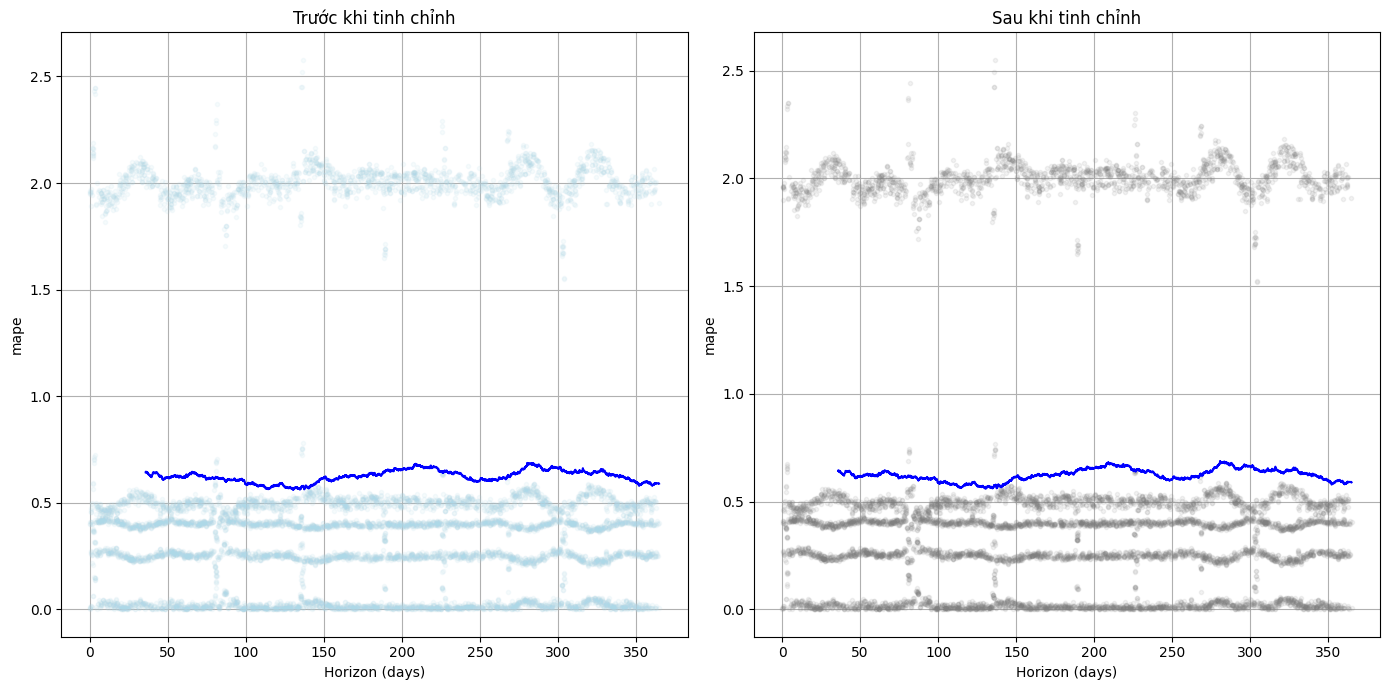

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))

fig1 = plot_cross_validation_metric(data_coss_var, metric='mape', ax=axs[0])
fig1.get_axes()[0].get_lines()[0].set_markerfacecolor('#ADD8E7')
fig1.get_axes()[0].get_lines()[0].set_markeredgecolor('#ADD8E7')
axs[0].set_title('Trước khi tinh chỉnh')


fig2 = plot_cross_validation_metric(data_coss_var_turning, metric='mape', ax=axs[1])
fig2.get_axes()[1].get_lines()[1].set_markerfacecolor('#ADD8E7')
fig2.get_axes()[1].get_lines()[1].set_markeredgecolor('#ADD8E7')
axs[1].set_title('Sau khi tinh chỉnh')

plt.tight_layout()
plt.show()

Ta thấy được sau khi tinh chỉnh thì giá trị sai số của dự đoán có thay đổi nhưng không đáng kể

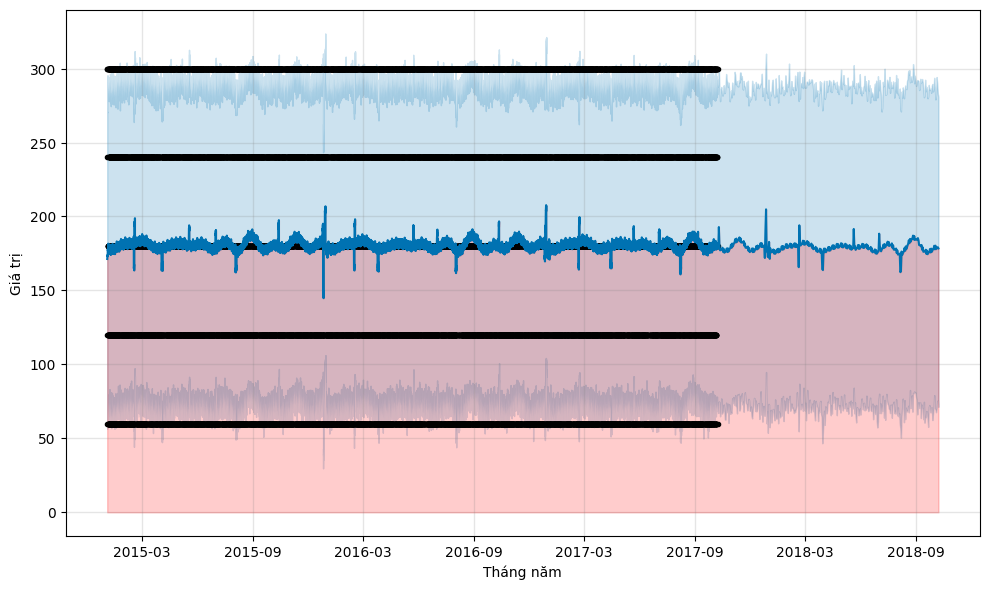

In [ ]:

fig = prophet_best.plot(new_forecast)
plt.fill_between(new_forecast['ds'],new_forecast['yhat'],color='red', alpha=0.2)
plt.xlabel('Tháng năm')
plt.ylabel('Giá trị')
plt.show()


###Thứ nhất: Bài toán mà nhóm em đặt ra ở bài tiểu luận này là sản phẩm bán chạy nhất của công ty sẽ đạt  được bao nhiêu doanh thu trong 12 tháng tới ?

In [ ]:
# #cắt data
start_date = '2017-10-01'
end_date = '2018-10-31'
data_yhat = new_forecast.copy()
# Chuyển đổi kiểu dữ liệu của cột 'ds' sang kiểu datetime
data_yhat['ds'] = pd.to_datetime(data_yhat['ds'])

# Sử dụng phương thức loc để cắt dữ liệu
new_data = data_yhat.loc[(data_yhat['ds'] >= start_date) & (data_yhat['ds'] <= end_date)]

new_data.head(4)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Additional Day,Additional Day_lower,Additional Day_upper,Boxing Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20017,2017-10-01 01:24:00,180.372089,67.386213,290.141726,180.372089,180.372089,0.0,0.0,0.0,0.0,...,-0.654857,-0.654857,-0.654857,-0.529141,-0.529141,-0.529141,0.0,0.0,0.0,177.794983
20018,2017-10-01 02:27:00,180.372082,61.281647,283.276072,180.372082,180.372082,0.0,0.0,0.0,0.0,...,-0.571857,-0.571857,-0.571857,-0.518044,-0.518044,-0.518044,0.0,0.0,0.0,177.169510
20019,2017-10-01 02:37:00,180.372081,58.967568,284.432746,180.372081,180.372081,0.0,0.0,0.0,0.0,...,-0.557456,-0.557456,-0.557456,-0.516290,-0.516290,-0.516290,0.0,0.0,0.0,177.178925
20020,2017-10-01 06:08:00,180.372058,78.733489,285.515796,180.372058,180.372058,0.0,0.0,0.0,0.0,...,-0.183792,-0.183792,-0.183792,-0.479718,-0.479718,-0.479718,0.0,0.0,0.0,178.294804


Em sẽ tính doanh thu trong 12 tháng tới bằng cách lấy trung bình doanh thu một ngày nhân cho 365 ngày tới (trừ đi các ngày nghĩ) ở đây sẽ có 2 ngày nghĩ thứ 7 và chủ nhật

In [ ]:
DT_y=new_data['yhat'].mean()*(365-(12*2))
DT_m = DT/12
print(f'Doanh thu một tháng là:{round(DT_m,2)}')
print(f'Doanh thu trong 12 tháng tới là:{round(DT_y, 2)}')

Doanh thu một tháng là:5096.24
Doanh thu trong 12 tháng tới là:61154.91


Tính toán mức đặt hàng lại,mức tồn kho,mức đặt hàng

In [ ]:
# ROP = D *LT
# Dự báo trong trung bình doanh số trong một ngày
D = new_data['yhat'].mean()
print(f"Trung bình doanh số một ngày: {round(D)}")

# Ở đây em cho max ngày chờ hàng
LT = data1['Lead Time'].max()
print(f"Thời gian chờ: {LT}")

ROP = D * LT

print(f"Điểm đặt hàng lại là : {round(ROP)} trong thời gian chờ là :{LT}")

Trung bình doanh số một ngày: 179
Thời gian chờ: 4
Điểm đặt hàng lại là : 717 trong thời gian chờ là :4


In [ ]:
#Tồn kho an toàn=[doanh số bán hàng tối đa hàng ngày x thời gian giao hàng tối đa] – [ doanh số bán hàng trung bình hàng ngày x thời gian giao hàng trung bình]
max_daily_forecasted_sales = new_data['yhat'].max()
print(f"Doanh số cao nhất trong một ngày: {round(max_daily_forecasted_sales)}")

max_lead_time = LT + data1['Lead Time'].max()
print(f"Thời gian thực hiện tối đa: {max_lead_time}")

safety_stock = (max_daily_forecasted_sales * max_lead_time) - ROP
print(f"Tồn kho an toàn: {round(safety_stock)}")

Doanh số cao nhất trong một ngày: 205
Thời gian thực hiện tối đa: 8
Tồn kho an toàn: 921


In [ ]:
#Điểm đặt hàng lại = Tồn kho an toàn+ (Doanh số trung bình hàng ngày x Thời gian giao hàng trong ngày)
# Tính lại mức đặt hàng lại
reorder_point = ROP + safety_stock
print(f"Điểm đặt hàng lại tối ưu cho sản phẩm bán chạy nhất là {round(reorder_point)}")

Điểm đặt hàng lại tối ưu cho sản phẩm bán chạy nhất là 1639


## Số lượng đặt hàng kinh tế (EOQ)

Ta sử dụng mô hình Số lượng đặt hàng kinh tế (EOQ) để tính toán số lượng đặt hàng tối ưu cho sản phẩm bán chạy nhất. Mô hình EOQ xác định số lượng đặt hàng tối ưu nhằm giảm thiểu tổng chi phí tồn kho.



Công thức cơ bản cho EOQ là:

EOQ= sqrt(2DS/H)


Trong đó:

D là nhu cầu hàng hóa trong một khoảng thời gian cụ thể (thường là số lượng hàng hóa cần mua trong một năm).

S là chi phí đặt hàng cho mỗi lần đặt hàng.

H là chi phí cất giữ hàng tồn kho cho mỗi đơn vị trong một khoảng thời gian

In [ ]:
#lấy giá của sản phẩm bán chạy nhất
#như ở trên id của sản phẩm bán chạy nhất là 365
product_price = data_top_product['Product Price'].iloc[0]
print(f"Giá: {round(product_price,2)}")
#ở đây ta lấy H=1 0% và s=30%
H = 0.10 * product_price
S = 0.30 * product_price
D = new_data['yhat'].mean()

print(f"Tỷ lệ nhu cầu trong một ngày là: {round(D,2)}")
print(f"Chi phí giữ hàng là: {round(H)}")
print(f"Chi phí đặt hàng là: {round(S)}")

EOQ = np.sqrt((2 * D * S) / H)
print(f"Số lượng đặt hàng trong một ngày là: {round(EOQ)}")

Giá: 59.99
Tỷ lệ nhu cầu trong một ngày là: 179.34
Chi phí giữ hàng là: 6
Chi phí đặt hàng là: 18
Số lượng đặt hàng trong một ngày là: 33


## Tìm các đặc trưng ảnh hưởng đến dự báo bằng RandomForestRegressor

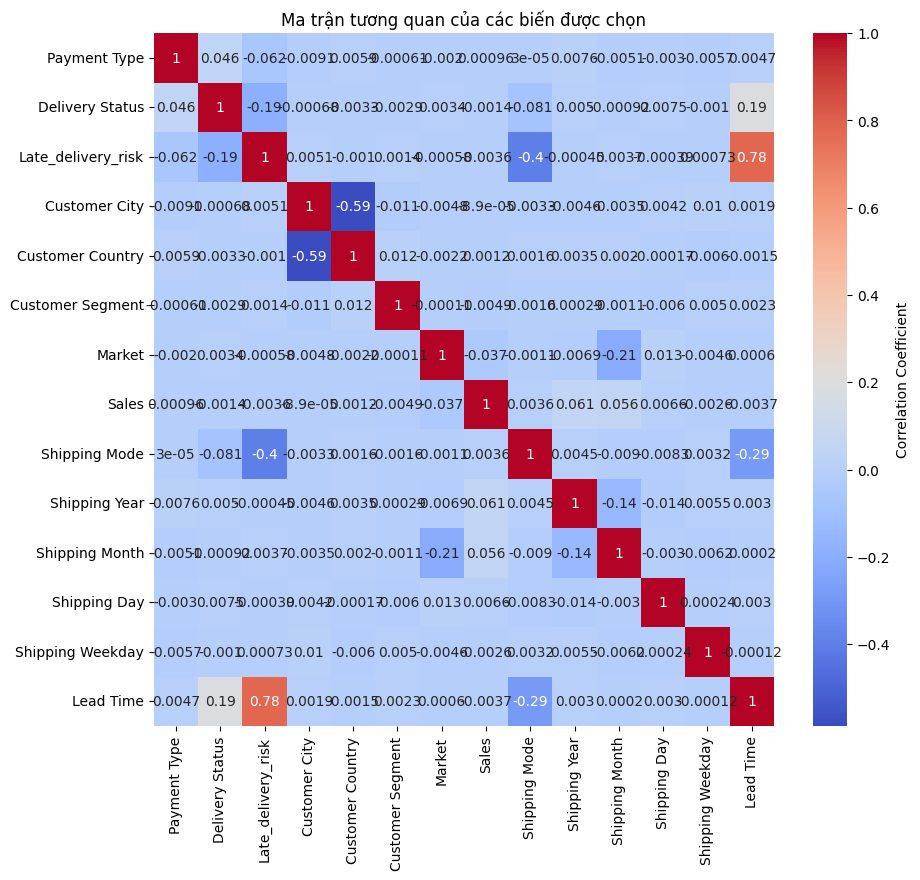

In [ ]:
data_copy = label_encode_df.drop(columns=['Product Price'])
correlation_matrix = data_copy.corr()

plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Ma trận tương quan của các biến được chọn')
plt.show()

Lấy đặc trưng để train

In [ ]:
#cắt đặc trưng
X_features = onehot_encode_df.drop(columns=['Sales','Product Price'])
X_features = X_features.drop(columns=['Shipping Year'])
y_target = onehot_encode_df['Sales']

#chia ra tập train và test
X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)
#gọi mô hình
rf_model = RandomForestRegressor(n_estimators=150, max_depth=10,  min_samples_split=2)
#train mô hình
rf_model.fit(X_train, y_train)


## Top 5 đặc trưng ảnh hưởng đến dự báo

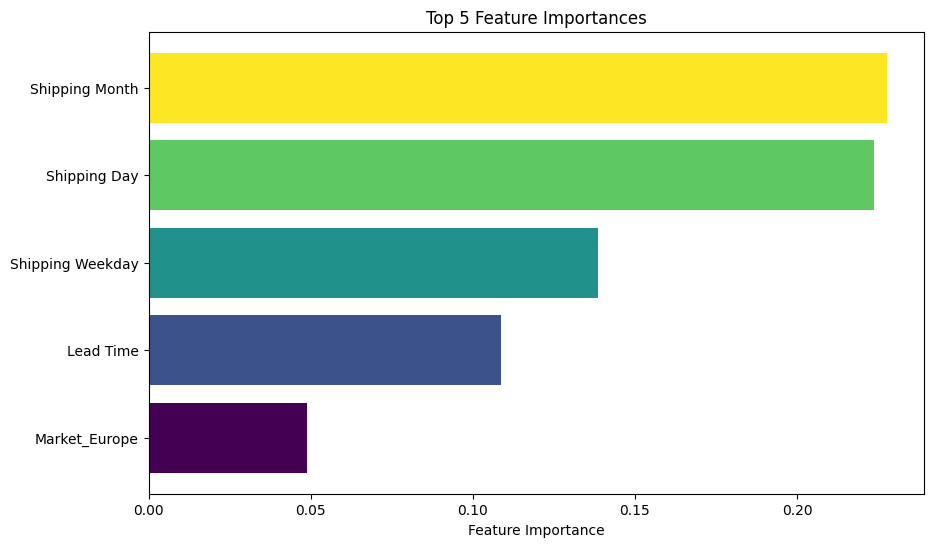

In [ ]:

feature_importances = rf_model.feature_importances_

top_5_feature_importances = feature_importances.argsort()[-5:]
plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1,
                                len(top_5_feature_importances)))
plt.barh(X_train.columns[top_5_feature_importances],
         feature_importances[top_5_feature_importances],
          color=colors)
plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importances')
plt.show()